In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [129]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [107]:
inspector = inspect(engine)

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [139]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

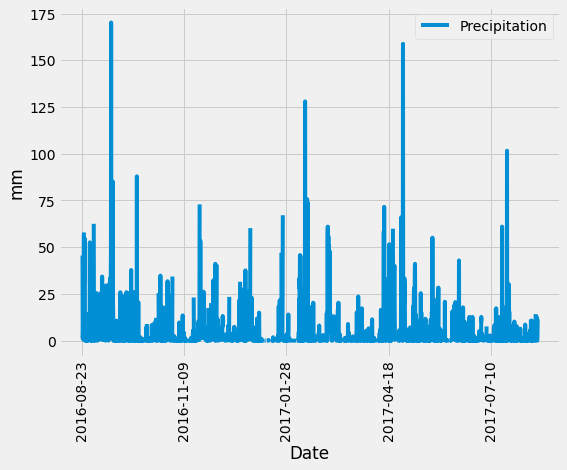

In [109]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
date1year = date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= date1year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
dateprcp_dict = [{"Date":row[0],"Precipitation":row[1]} for row in result]
dateprcp_df = pd.DataFrame(dateprcp_dict).set_index("Date")

# Sort the dataframe by date
dateprcp_df = dateprcp_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
dateprcp_bar = dateprcp_df.plot(rot=90, figsize=(8,6))
dateprcp_bar.set_ylabel("mm")
plt.show()

In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dateprcp_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [86]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(func.count(Measurement.station.distinct())).first()
total_station[0]

9

In [89]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.id)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

The station with ID 'USC00519281' has the greatest number of observations

In [94]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
actstation = session.query(*sel).filter(Measurement.station == 'USC00519281').all()
actstation

[('USC00519281', 12.2, 29.4, 22.03582251082252)]

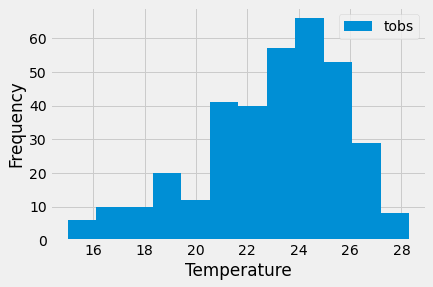

In [143]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.tobs).\
            filter(Measurement.station == 'USC00519281').\
            filter(Measurement.date >= date1year).all()
temp_obs_dict = [{"tobs":row[0]} for row in temp_obs]
temp_obs_df = pd.DataFrame(temp_obs_dict)
temp_obs_plot = temp_obs_df.plot(kind="hist",bins=12)
temp_obs_plot.set_xlabel("Temperature")
plt.show()

# Close session

In [106]:
# Close Session
session.close()